# Customer Sentiment Analysis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

In [2]:
df= pd.read_csv('df.csv')
df.head()

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,Word Counts,review length,Sentiment
0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates,"Counter({'and': 2, 'Absolutely': 1, 'wonderful...",8,True
1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses,"Counter({'i': 5, 'a': 4, ""it's"": 2, 'it': 2, '...",62,True
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses,"Counter({'the': 5, 'it': 4, 'i': 4, 'and': 3, ...",98,True
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants,"Counter({'love,': 2, 'i': 2, 'I': 1, 'love': 1...",22,True
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses,"Counter({'is': 3, 'to': 3, 'it': 3, 'the': 2, ...",36,True


## 1.1 What is the Customer Age Distribution?

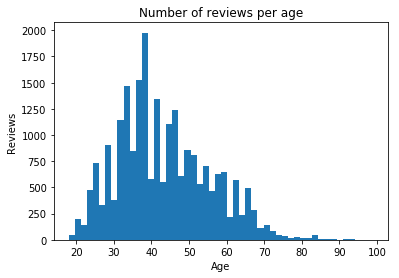

In [3]:
plt.hist(df.Age,bins=50)
plt.xlabel('Age')
plt.grid(False)
plt.ylabel('Reviews')
plt.title('Number of reviews per age')
plt.show()

####  the plot shows that the most reviewing age is between 35 - 45 , and the most reiviewers of them are around age 38

## 1.2 What is the Rating distribution based on age?

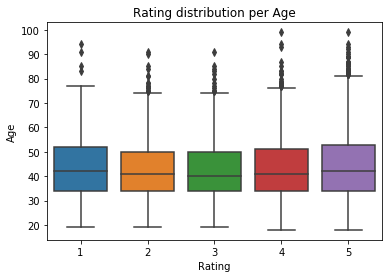

In [4]:
sns.boxplot(x='Rating',y='Age',data=df)
plt.title('Rating distribution per Age')
plt.show()

#### it looks like Rating score is not mainly related to different Age Group

## 1.3 What is the relationship between Positive Feedback vs Age?

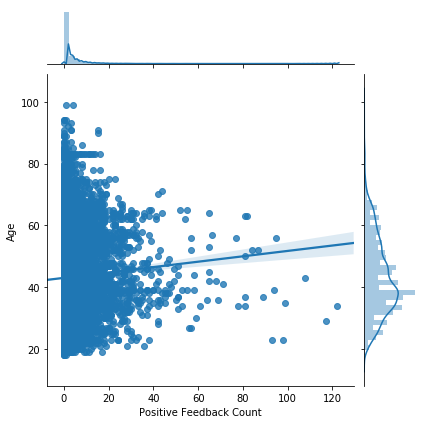

In [5]:
sns.jointplot(df['Positive Feedback Count'],df.Age,kind='reg')
plt.show()

#### there is a slight correlation between Age and Positive Feedback Count, and compared the plot above,  the age group who write the review most, are always give the more positive feedback as well. As there are some high count feedback reviews, I will focus on those text analysis in machine learning part.

## 2.1 What is the  overall Rating distribution?

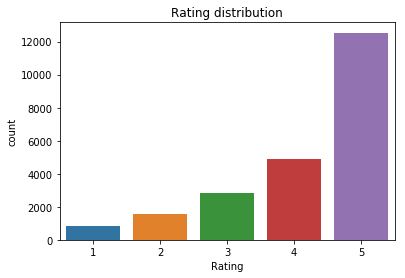

In [6]:
sns.countplot(df.Rating)
plt.title('Rating distribution')
plt.show()

#### As we can see, most of the customers had been rating with a high score(3-5) on this railer's products and most of them are rated as 5 out of 5. 

## 2.2 which item is the most popular?

In [7]:
print('the total number of Clothing ID in this dataset is: '+str(len(df['Clothing ID'].value_counts())))

the total number of Clothing ID in this dataset is: 1179


#### there are more than 1179 unique clothing ID rating in this review dataset. due to the big amout of numbers, I will only plot the top 30 clothing ID customer reviewed most.

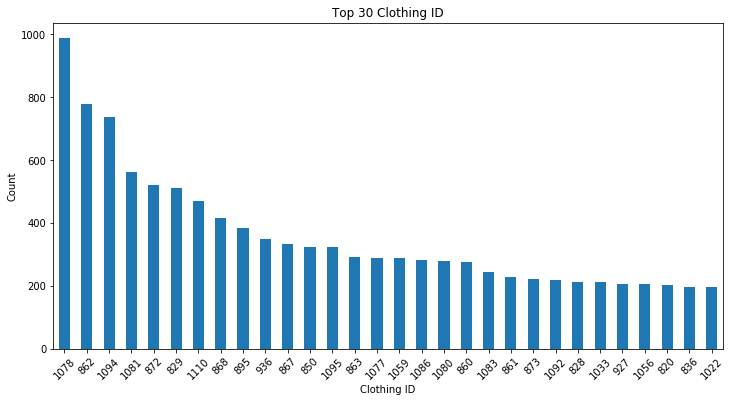

In [8]:
plt.figure(figsize=(12, 6))
df['Clothing ID'].value_counts()[:30].plot(kind='bar')
plt.xticks(rotation=45)
plt.xlabel('Clothing ID')
plt.ylabel('Count')
plt.title('Top 30 Clothing ID')
plt.show()

In [9]:
df[df['Clothing ID'].isin([1078, 862,1094])].describe().drop('count',axis=0).drop('Clothing ID',axis =1)

,Age,Rating,Recommended IND,Positive Feedback Count,review length
mean,42.724800,4.189200,0.818400,2.862400,60.591200
std,12.150429,1.104306,0.385592,6.773021,28.731486
min,18.000000,1.000000,0.000000,0.000000,2.000000
25%,34.000000,4.000000,1.000000,0.000000,36.000000
50%,41.000000,5.000000,1.000000,1.000000,60.000000
75%,51.000000,5.000000,1.000000,3.000000,89.000000
max,99.000000,5.000000,1.000000,98.000000,115.000000


In [10]:
df1=df[df['Clothing ID'].isin([1078,863,1094])]['Class Name'].unique()
print('the most popular riewing items are : '+ str(df1))

the most popular riewing items are : ['Dresses' 'Knits']


####  Even though we don't really know the exact item of this Clothing ID represent, however, based on my analysis, we can see that the Top 3 Clothing ID holds a large values of customer reviews, and they are in 'Dresses' and 'knits' Class, which is really useful for the company to target the market

#### Also, As shown above, the Top 3 items with higher reviews counts get the high Rating and High Recommended IND number

## 2.3 Customer Recommandation Reivews 

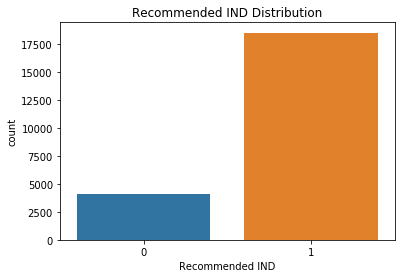

In [11]:
sns.countplot(df['Recommended IND'])
plt.title('Recommended IND Distribution')
plt.show()

In [12]:
dislike = df['Recommended IND'].value_counts()[0]/(df['Recommended IND'].value_counts()[0]+df['Recommended IND'].value_counts()[1])
print('The Not recommend Portion in this datset is : '+str(dislike))

The Not recommend Portion in this datset is : 0.18113157546044786


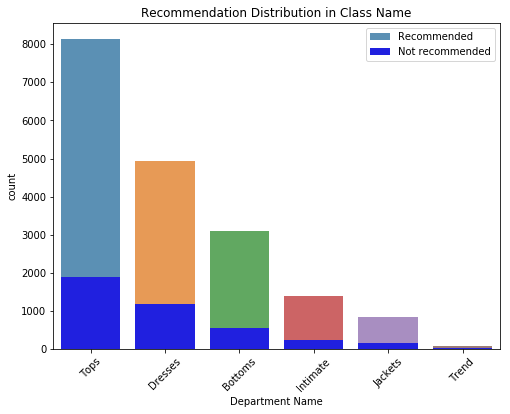

In [21]:
plt.figure(figsize = ((8,6)))
recommended = df[df['Recommended IND'] ==1]
not_recommended = df[df['Recommended IND']==0]
sns.countplot(recommended['Department Name'], order=df["Department Name"].value_counts().index,alpha=0.8, label = 'Recommended')
sns.countplot(not_recommended['Department Name'],order = df["Department Name"].value_counts().index,color= 'b',label='Not recommended')
plt.xticks(rotation=45)
plt.legend(loc= 'upper right')
plt.title('Recommendation Distribution in Class Name')
plt.show()

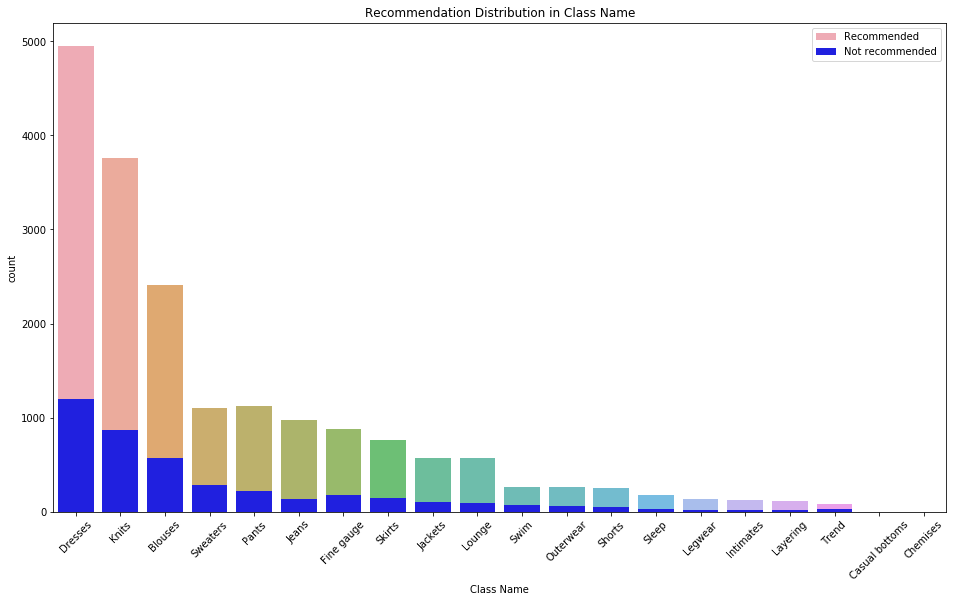

In [14]:
plt.figure(figsize = ((16,9)))
sns.countplot(recommended['Class Name'], order=df["Class Name"].value_counts().index,alpha=0.8, label = 'Recommended')
sns.countplot(not_recommended['Class Name'],order = df["Class Name"].value_counts().index,color= 'b',label='Not recommended')
plt.xticks(rotation=45)
plt.legend(loc= 'upper right')
plt.title('Recommendation Distribution in Class Name')
plt.show()

#### the overall customer satisfation rate is 82% in 20 classes, which means most people who rate 3 also recommend this item. Also, the Dresses and Knits which are the most popular Class also holds more nagetive reviews. Top, the most popular department has less dislike ratio than dress. I will deep to the key words analysis to find which words more represents 'good' or 'bad' review.

## 3 Text length Analysis and Key word 

### 3.1 Is there a relationship between text length and customer Rating?  

In [15]:
rating = df.groupby(['Rating'])['Word Counts'].count()
rating

Rating
1      821
2     1549
3     2823
4     4908
5    12540
Name: Word Counts, dtype: int64

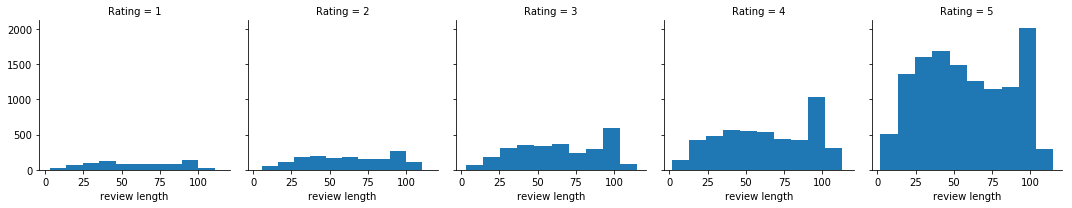

In [16]:
g = sns.FacetGrid(df,col='Rating')
g= g.map(plt.hist,'review length')

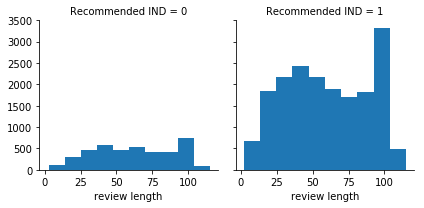

In [17]:
g = sns.FacetGrid(df,col='Recommended IND')
g= g.map(plt.hist,'review length')

#### There is a significant relation between review length vs. review rating

### 3.2  WordCloud Analysis

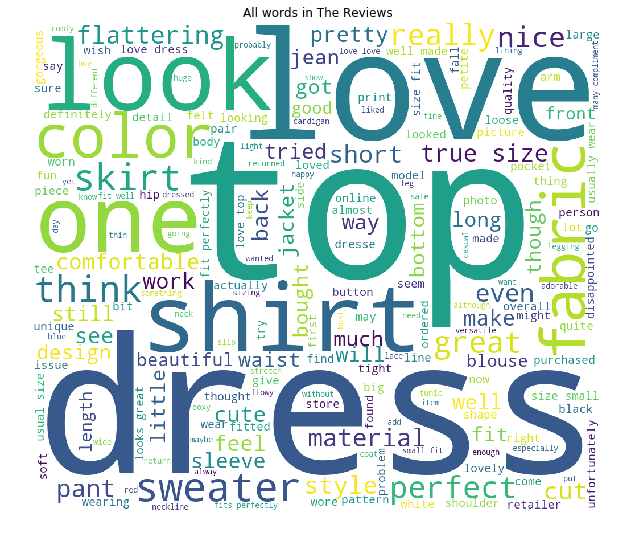

In [18]:
plt.figure(figsize = ((16,9)))
wordcloud = WordCloud(background_color='white',width=1000, height=860).generate(''.join(df['Review Text']))
plt.imshow(wordcloud)
plt.title('All words in The Reviews')
plt.axis('off')
plt.show()

##### the overall sentiment key words are : love, perfect, confortable, great, nice,etc. Customers are  more concerned with the well design, quality and good looking.

#### I also want to check the key words below rate 3 , see if there are some new words accour.

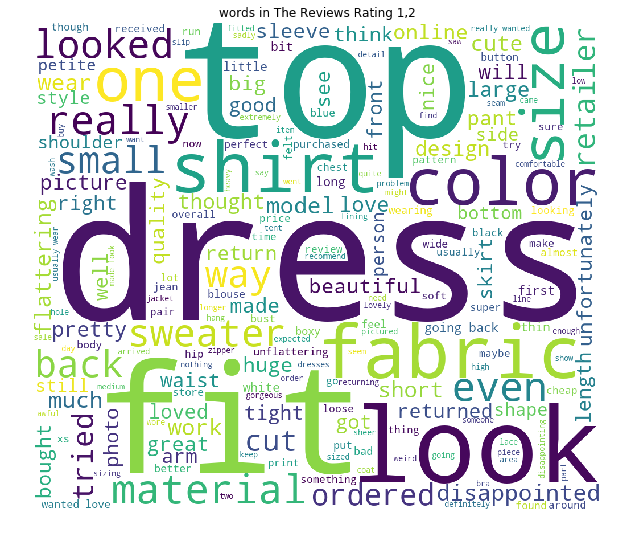

In [19]:
rate_low = df[df['Rating']< 3]['Review Text']
plt.figure(figsize = ((16,9)))
wordcloud = WordCloud(background_color='white',width=1000, height=860).generate(''.join(rate_low))
plt.imshow(wordcloud)
plt.title('words in The Reviews Rating 1,2')
plt.axis('off')
plt.show()

##### some nagetive words detacted: small,larg,huge, disappointed,unflattering,size, fabric,back,tired.etc.  Size would be the biggest reason for return. 